# 3D Coordinate Systems

## Conventions

In 2D coordinate system it is fairly standard to for +x to point to the right and +y to point up. In 3D coordinate systems we need a 3rd axis that is orthogonal to the other two but it is not standardized how to orient these axis. We will use use a right-handed coordinate system. The name derives from the right-hand rule. If the index finger of the right hand is pointed forward, the middle finger bent inward at a right angle to it, and the thumb placed at a right angle to both, the three fingers indicate the relative orientation of the x-, y-, and z-axes in a right-handed system <a href="https://en.wikipedia.org/wiki/Cartesian_coordinate_system#In_three_dimensions" target="_blank">Wikipedia</a>

In plots we will color the x-axis in red, the y-axis in green and the z-axis in blue.

## Rotation in 3D

### Euler angles

The <a href="https://en.wikipedia.org/wiki/Euler_angles" target="_blank">Euler angles</a> are three angles to describe the orientation of a rigid body with respect to a fixed coordinate system.

A general rotation of an object on 3D space is broken down to three rotations around the axis of a coordinate system.

Rotation about z axis:

$$
\begin{bmatrix}
x^{'}\\
y^{'}\\
z^{'}\\
1\\
\end{bmatrix} =
\begin{bmatrix}
\cos(\theta_z) & -\sin(\theta_z) & 0 & 0\\
\sin(\theta_z) & \cos(\theta_z) & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix}
\begin{bmatrix}
x\\
y\\
z\\
1\\
\end{bmatrix}
$$

Rotation about x axis:

$$
\begin{bmatrix}
x^{'}\\
y^{'}\\
z^{'}\\
1\\
\end{bmatrix} =
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & \cos(\theta_x) & -\sin(\theta_x) & 0\\
0 &\sin(\theta_x) & \cos(\theta_x) & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix}
\begin{bmatrix}
x\\
y\\
z\\
1\\
\end{bmatrix}
$$

Rotation about y axis:

$$
\begin{bmatrix}
x^{'}\\
y^{'}\\
z^{'}\\
1\\
\end{bmatrix} =
\begin{bmatrix}
\cos(\theta_x) & 0 & \sin(\theta_x) & 0\\
0 & 1 & 0 & 0\\
-\sin(\theta_x) & 0 & \cos(\theta_x) & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix}
\begin{bmatrix}
x\\
y\\
z\\
1\\
\end{bmatrix}
$$

### Gimbal lock

There is a corner case when using Euler angles that leads to a <a href="https://www.youtube.com/watch?v=zc8b2Jo7mno" target="_blank">gimbal lock</a>

### Quaternion

To avoid the issue of grimbal look we can also use <a href="https://en.wikipedia.org/wiki/Quaternion" target="_blank">quaternions</a> to describe a rotation in 3D space.

Quaternions are generally represented in the form

$$ a + b\textbf{i} + c\textbf{j} +d\textbf{k} $$

where a, b, c, and d are real numbers and **i**, **j**, and **k** are the basic quaternions. The following properties hold:

$$ \textbf{i}^2 = \textbf{j}^2 = \textbf{k}^2 = \textbf{i}\textbf{j}\textbf{k} = -1 $$

### Axis-angle

With the <a href="https://en.wikipedia.org/wiki/Axis–angle_representation" target="_blank">Axis–angle representation</a> we describe a rotation in 3D space by a unit vector **e** indicating the direction of an axis of rotation, and an angle $\theta$ describing the magnitude of the rotation about the axis

### Rotation matrix

The rotation matrix R specifies the rotation. 

With Euler angles we have the rotation matrix:

$$ R\left( \theta_x, \theta_y, \theta_z \right) = R_z\left( \theta_z \right)R_y\left( \theta_y \right)R_x\left( \theta_x \right)$$

$$ R\left( \theta_x, \theta_y, \theta_z \right) = 
\begin{bmatrix}
c_y c_z & s_x s_y c_z - c_x s_z & c_x s_y s_z - s_x c_z & 0\\
c_y s_z & s_x s_y s_z + c_x c_z & c_x s_y s_z - s_x c_z & 0 \\
-s_y & s_x c_y & c_x c_y & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}$$
$$ c_i = \cos\left( \theta_i \right) $$
$$ s_i = \sin\left( \theta_i \right) $$


### TODO
rotation matrix with quaternions

rotation matrix with axis-angle

### Active or passive rotation

This part is still TODO

## Transformations in 3D

### Position and quaternion

### Dual quaternion

### Transformation matrix

### Graph of Transformations

## Pose

This part is still TODO

## Python transformation libraries

In ROS 1, the TF library provided the helpful `transformations.py` module for doing various rotation-based conversions.

However, ROS 2 only supports TF2

Quoting from TF (Tully Foote) himself on ROS Answers,
> tf.transformations is a fork of <a href="https://github.com/cgohlke/transformations" target="_blank">transformations</a>. This package has been deprecated "Transformations.py is no longer actively developed and has a few known issues and numerical instabilities."

The recommended alternative is a package available via pip called <a href="https://github.com/matthew-brett/transforms3d" target="_blank">transforms3d</a>.

A more recent project is <a href="https://github.com/rock-learning/pytransform3d" target="_blank">pytransform3d</a>

The SciPy framework provides <a href="https://docs.scipy.org/doc/scipy/reference/spatial.html" target="_blank">scipy spatial</a>

We will use pytransform3d for our studies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
import os
from pytransform3d.urdf import UrdfTransformManager

In [3]:
tm = UrdfTransformManager()
with open('../mini-pupper_description/urdf/mini-pupper.urdf', "r") as f:
    tm.load_urdf(f.read(), package_dir='../')

In [4]:
whitelist = []
legs = ['rf', 'lf', 'rh', 'lh']
for l in legs:
    whitelist.append("%s_hip_link" % l)
    whitelist.append("%s_upper_leg_link" % l)
    whitelist.append("%s_lower_leg_link" % l)
    whitelist.append("%s_foot_link" % l)

Text(0.5, 0, 'Z axis')

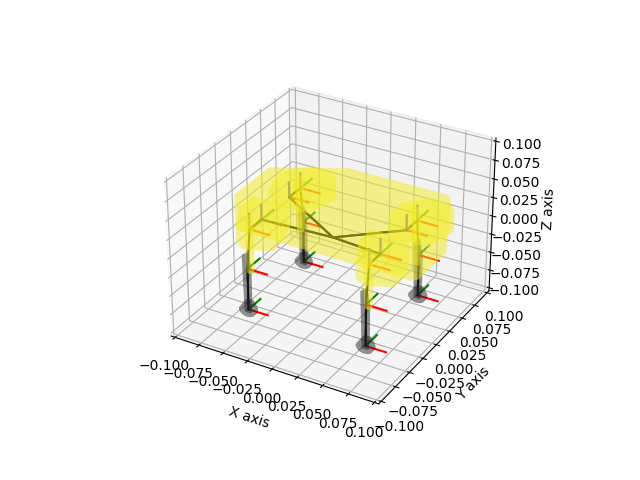

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for joint in tm._joints.keys():
    tm.set_joint(joint, 0.0)
    if "1_" in joint:
        tm.set_joint(joint, np.pi/4)
    if "2_" in joint:
        tm.set_joint(joint, -np.pi/2)
ax = tm.plot_frames_in('mini-pupper', whitelist=whitelist, s=0.02, show_name=False, ax=ax)
ax = tm.plot_connections_in("mini-pupper", ax=ax)
tm.plot_visuals("mini-pupper", ax=ax)
ax.set_xlim((-0.1, 0.1))
ax.set_ylim((-0.1, 0.1))
ax.set_zlim((-0.1, 0.1))
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

In [6]:
tm.transforms[('rf_upper_leg_link', 'rf_hip_link')]

array([[ 1.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  1.    ,  0.    , -0.0197],
       [ 0.    ,  0.    ,  1.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

In [7]:
tm.get_transform('rf_hip_link', 'mini-pupper')

array([[ 1.     ,  0.     ,  0.     ,  0.06014],
       [ 0.     ,  1.     ,  0.     , -0.0235 ],
       [ 0.     ,  0.     ,  1.     ,  0.0171 ],
       [ 0.     ,  0.     ,  0.     ,  1.     ]])

In [8]:
tm.get_transform('rf_foot_link', 'mini-pupper')

array([[ 1.     ,  0.     ,  0.     ,  0.06014],
       [ 0.     ,  1.     ,  0.     , -0.04795],
       [ 0.     ,  0.     ,  1.     , -0.0889 ],
       [ 0.     ,  0.     ,  0.     ,  1.     ]])

In [9]:
tm.transforms.keys()

dict_keys([('base_link', 'mini-pupper'), ('visual:base_link/0', 'base_link'), ('collision:base_link/0', 'base_link'), ('inertial_frame:base_inertia', 'base_inertia'), ('visual:lf_hip_link/0', 'lf_hip_link'), ('collision:lf_hip_link/0', 'lf_hip_link'), ('inertial_frame:lf_hip_link', 'lf_hip_link'), ('visual:lf_upper_leg_link/0', 'lf_upper_leg_link'), ('collision:lf_upper_leg_link/0', 'lf_upper_leg_link'), ('inertial_frame:lf_upper_leg_link', 'lf_upper_leg_link'), ('visual:lf_lower_leg_link/0', 'lf_lower_leg_link'), ('collision:lf_lower_leg_link/0', 'lf_lower_leg_link'), ('inertial_frame:lf_lower_leg_link', 'lf_lower_leg_link'), ('visual:lf_foot_link/0', 'lf_foot_link'), ('collision:lf_foot_link/0', 'lf_foot_link'), ('inertial_frame:lf_foot_link', 'lf_foot_link'), ('visual:lh_hip_link/0', 'lh_hip_link'), ('collision:lh_hip_link/0', 'lh_hip_link'), ('inertial_frame:lh_hip_link', 'lh_hip_link'), ('visual:lh_upper_leg_link/0', 'lh_upper_leg_link'), ('collision:lh_upper_leg_link/0', 'lh_uppe

In [10]:
tm.write_png('transformations_graph.png')